In [11]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))
print("input img shape is: ", input_img.shape)

print("ENCODER PART")
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
print("after Conv2D, the shape is: ", x.shape)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
print("after MaxPooling2D, the shape is: ", x.shape)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
print("after Conv2D, the shape is: ", x.shape)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
print("after MaxPooling2D, the shape is: ", x.shape)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
print("after Conv2D, the shape is: ", x.shape)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)
print("after MaxPooling2D, the shape is: ", encoded.shape)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional
print("DECODER PART")
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
print("after Conv2D, the shape is: ", x.shape)
x = layers.UpSampling2D((2, 2))(x)
print("after UpSampling2D, the shape is: ", x.shape)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
print("after Conv2D, the shape is: ", x.shape)
x = layers.UpSampling2D((2, 2))(x)
print("after UpSampling2D, the shape is: ", x.shape)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
print("after Conv2D, the shape is: ", x.shape)
x = layers.UpSampling2D((2, 2))(x)
print("after UpSampling2D, the shape is: ", x.shape)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
print("after Conv2D, the shape is: ", decoded.shape)


autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

input img shape is:  (None, 28, 28, 1)
ENCODER PART
after Conv2D, the shape is:  (None, 28, 28, 16)
after MaxPooling2D, the shape is:  (None, 14, 14, 16)
after Conv2D, the shape is:  (None, 14, 14, 8)
after MaxPooling2D, the shape is:  (None, 7, 7, 8)
after Conv2D, the shape is:  (None, 7, 7, 8)
after MaxPooling2D, the shape is:  (None, 4, 4, 8)
DECODER PART
after Conv2D, the shape is:  (None, 4, 4, 8)
after UpSampling2D, the shape is:  (None, 8, 8, 8)
after Conv2D, the shape is:  (None, 8, 8, 8)
after UpSampling2D, the shape is:  (None, 16, 16, 8)
after Conv2D, the shape is:  (None, 14, 14, 16)
after UpSampling2D, the shape is:  (None, 28, 28, 16)
after Conv2D, the shape is:  (None, 28, 28, 1)


In [2]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [4]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                # epochs=50,
                epochs=2,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/2
469/469 [==============================] - 30s 61ms/step - loss: 0.2152 - val_loss: 0.1497
Epoch 2/2
469/469 [==============================] - 28s 59ms/step - loss: 0.1382 - val_loss: 0.1288


In [5]:
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 2s 6ms/step


In [8]:
print(decoded_imgs.shape)

(10000, 28, 28, 1)


In [10]:
print(x_test.shape)

(10000, 28, 28, 1)


313/313 [==============================] - 2s 6ms/step


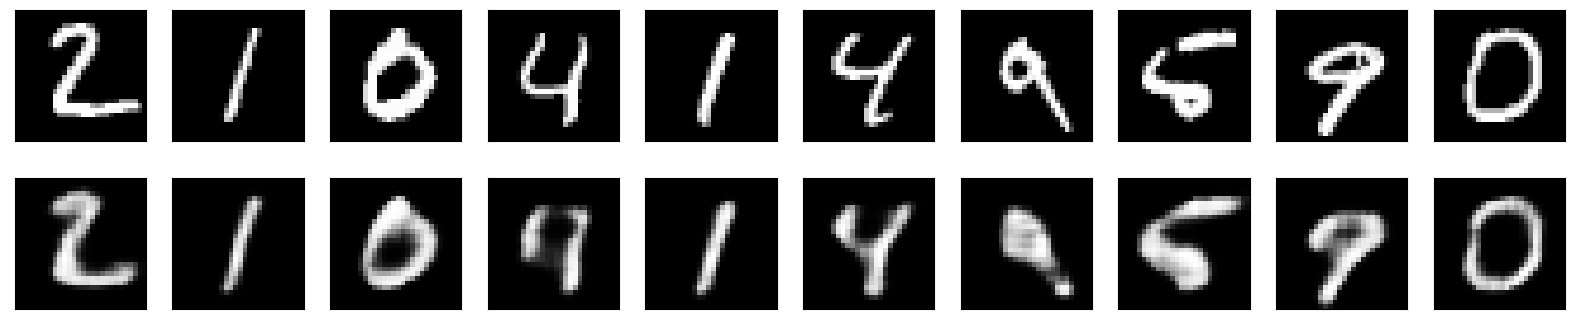

In [6]:
import matplotlib.pyplot as plt
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

313/313 [==============================] - 1s 3ms/step


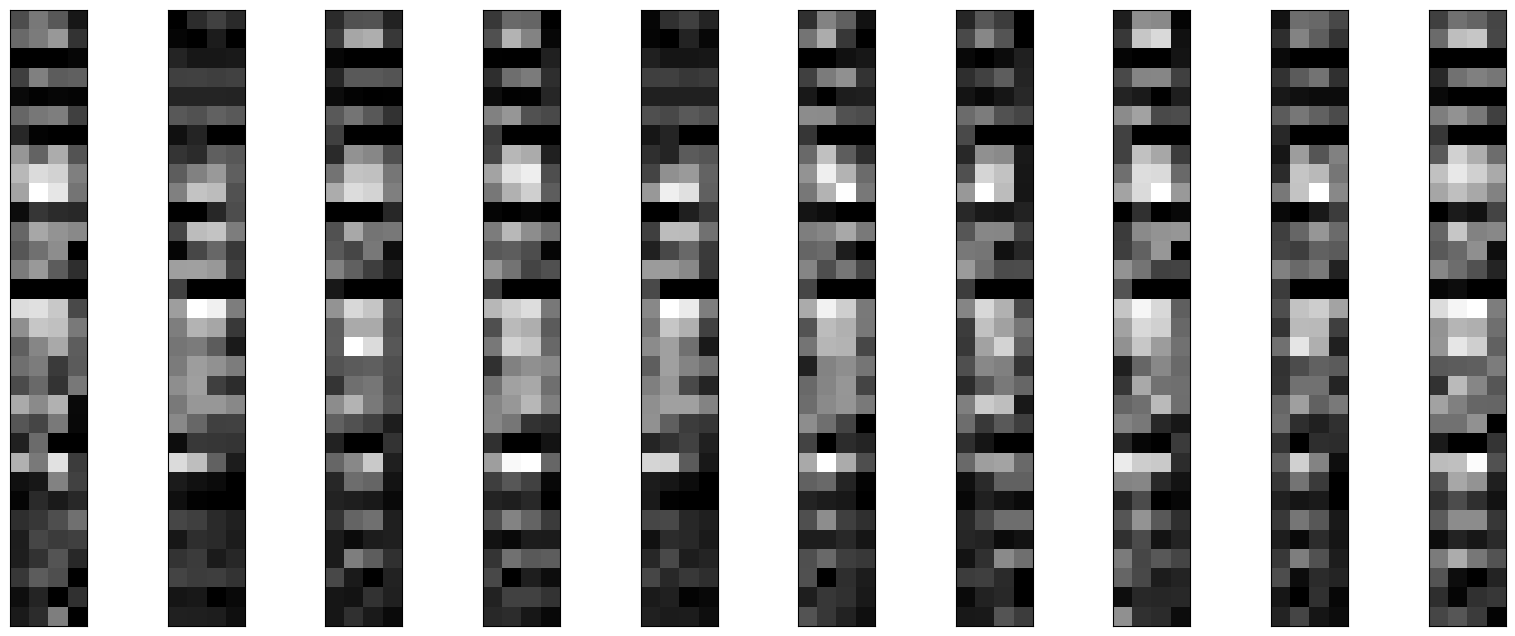

In [6]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()